In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# 2a

In [4]:
absentees = np.array([0, 3, 1, 2, 1, 0, 4, 0, 1, 1, 2, 3, 1, 0, 0, 2, 4, 6, 4, 2, 1, 0, 1, 1])
freq_tab_data = np.unique(absentees, return_counts=True)
freq_tab_df = pd.DataFrame(freq_tab_data[1], index=freq_tab_data[0], columns=["count"])
freq_tab_df

,count
0,6
1,8
2,4
3,2
4,3
6,1


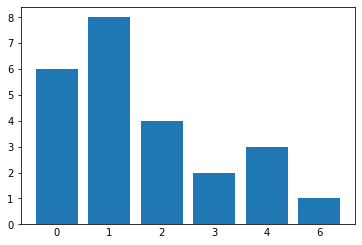

In [5]:
plt.bar(x=list(range(len(freq_tab_df))), height=freq_tab_df["count"], tick_label=freq_tab_df.index)
plt.tick_params(axis='x', length=0)
plt.show()

# 2c

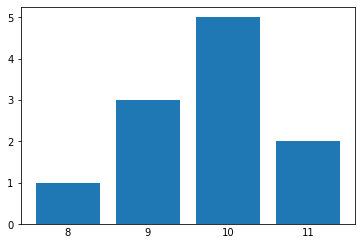

In [6]:
shoe_sizes = [10, 10, 8, 11, 10, 9, 9, 10, 11, 9, 10]
bar_data = np.unique(shoe_sizes, return_counts=True)

plt.bar(x=range(len(bar_data[0])), height=bar_data[1], tick_label=bar_data[0])
plt.tick_params(axis='x', length=0)
plt.show()


# 2d

Note that matplotlib's hist function produces left-closed bins, as required in the question. The last bin is closed on both sides, which does not match the question, but as we do not have the value 1000 in the data set, we don't have to worry about it.

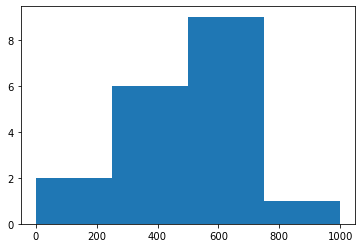

In [7]:
sprice = [950, 350, 400, 500, 200, 550, 600, 300, 600, 700, 700, 200, 700, 600, 350, 500, 450, 400]

plt.hist(sprice, bins=[0, 250, 500, 750, 1000])
plt.show()

# 2f

In [8]:
freq_tab_df = pd.DataFrame({'count':[4,12,37,14]}, index=['0-29','30-49','50-69', '70-99'])
freq_tab_df

,count
0-29,4
30-49,12
50-69,37
70-99,14


In [9]:
hist_tab_df = freq_tab_df.copy()
hist_tab_df

,count
0-29,4
30-49,12
50-69,37
70-99,14


In [10]:
hist_tab_df[['lbound', 'rbound']] = hist_tab_df.index.to_series().str.split('-', expand = True).astype('int')
hist_tab_df['width'] = hist_tab_df['rbound'] - hist_tab_df['lbound'] + 1
hist_tab_df

,count,lbound,rbound,width
0-29,4,0,29,30
30-49,12,30,49,20
50-69,37,50,69,20
70-99,14,70,99,30


In [11]:
hist_tab_df['divisors'] = hist_tab_df['width'] / hist_tab_df['width'][0]
hist_tab_df['height'] = (hist_tab_df['count'] / hist_tab_df['divisors']).round(2)
hist_tab_df

,count,lbound,rbound,width,divisors,height
0-29,4,0,29,30,1.000000,4.0
30-49,12,30,49,20,0.666667,18.0
50-69,37,50,69,20,0.666667,55.5
70-99,14,70,99,30,1.000000,14.0


In [12]:
hist_tab_df['mid_point'] = (hist_tab_df['rbound'] + hist_tab_df['lbound']) / 2
hist_tab_df

,count,lbound,rbound,width,divisors,height,mid_point
0-29,4,0,29,30,1.000000,4.0,14.5
30-49,12,30,49,20,0.666667,18.0,39.5
50-69,37,50,69,20,0.666667,55.5,59.5
70-99,14,70,99,30,1.000000,14.0,84.5


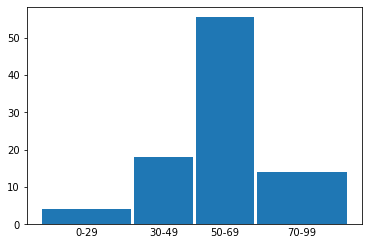

In [13]:
plt.tick_params(axis='x', length=0)
plt.bar(x=hist_tab_df['mid_point'], height=hist_tab_df['height'], width=hist_tab_df['width'] - 1, tick_label=hist_tab_df.index)
plt.show()

# 3d

In [168]:
df = pd.DataFrame([35, 52, 45, 70, 24, 43, 68, 77, 45, 28], columns=["Age"])

## (a)

In [169]:
df.mode()['Age'][0]

45

## (b)

In [190]:
med = df['Age'].median()
med

45.0

## (c)

In [191]:
df['Age'].mean()

48.7

## (d)

In [192]:
mx = df['Age'].max()
mn = df['Age'].min()
mx - mn

53

## (e)

In [193]:
df['Age'].var(ddof=1)

324.90000000000003

## (f)

In [194]:
df['Age'].std(ddof=1)

18.02498266295976

## (g)

Note that the quartiles have different values from those calculated by hand (35 and 68). There are various methods for calculating quartiles, of which we have seen only two. With large data sets the quartiles calculated by the different methods are not as different in value.

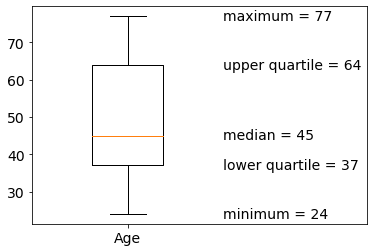

In [273]:
matplotlib.rcParams.update({'font.size': 14})
plt.boxplot(df['Age'], labels=['Age'])
plt.xlim([0.8, 1.5])
vals = np.array([mn, np.quantile(df['Age'], .25), med, np.quantile(df['Age'], .75), mx]).astype('int')
names = ["minimum", "lower quartile", "median", "upper quartile", "maximum"]
text = np.core.defchararray.add(names, np.repeat(" = ", len(names)))
text = np.core.defchararray.add(text, np.array(vals).astype('str'))
for i in range(0, 5):
    plt.text(1.2, y[i], text[i], verticalalignment='center')
plt.show()